In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
from scipy.special import rel_entr

In [12]:
# List of available dataset
df18 = pd.read_csv("../exp1-inf/predictions_res18.csv")
df50 = pd.read_csv("../exp1-inf/predictions_res50.csv")
df101 = pd.read_csv("../exp1-inf/predictions_res101.csv")
label = pd.read_csv("../exp1-inf/labels.csv")
binnum=6

In [13]:
prediction = pd.DataFrame({
    "pred18": df18.idxmax(axis=1),
    "pred50": df50.idxmax(axis=1),
    "pred101": df101.idxmax(axis=1),
    "target": label['target']
})
prediction["pred18"] = prediction["pred18"].str.extract('(\d+)').astype(int)
prediction["pred50"] = prediction["pred50"].str.extract('(\d+)').astype(int)
prediction["pred101"] = prediction["pred101"].str.extract('(\d+)').astype(int)

In [14]:
prediction.head()

,pred18,pred50,pred101,target
0,68,49,68,49
1,9,38,88,33
2,72,4,4,72
3,21,51,51,51
4,71,71,71,71


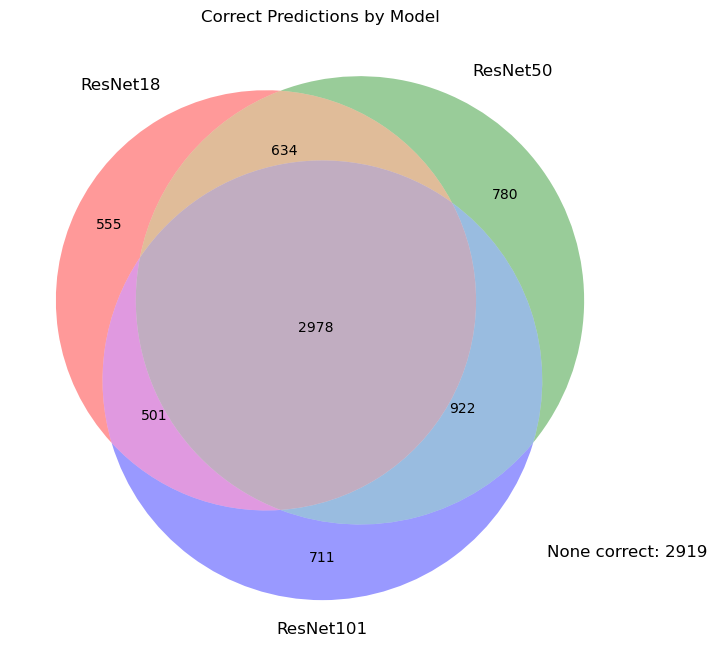

In [15]:
# Accuracy Venn Diagram:
df = prediction
correct_18 = set(df[df['pred18'] == df['target']].index)
correct_50 = set(df[df['pred50'] == df['target']].index)
correct_101 = set(df[df['pred101'] == df['target']].index)
total_indices = set(df.index)
incorrect_all = total_indices - (correct_18 | correct_50 | correct_101)
plt.figure(figsize=(8, 8))
venn_diagram = venn3([correct_18, correct_50, correct_101], ('ResNet18', 'ResNet50', 'ResNet101'))
plt.title('Correct Predictions by Model')
plt.text(0.5, -0.5, f'None correct: {len(incorrect_all)}', fontsize=12)
plt.show()

ou_res18=0.37059568272086435 | ou_res50=0.31509146007713273 | ou_res101=0.33243452083963154


Text(0, 0.5, 'Density')

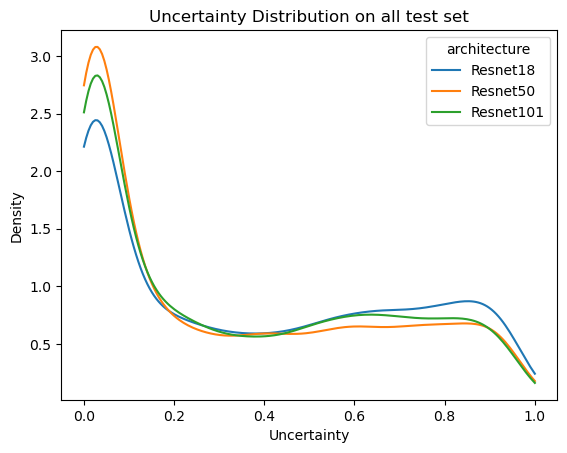

In [16]:
# Uncertainty Visualization
df18["uncertainty"]=1-df18.pow(2).sum(axis=1) # Brier Score
df50["uncertainty"]=1-df50.pow(2).sum(axis=1)
df101["uncertainty"]=1-df101.pow(2).sum(axis=1)
ou_res18 = df18["uncertainty"].mean()
ou_res50 = df50["uncertainty"].mean()
ou_res101 = df101["uncertainty"].mean()
print(f"{ou_res18=} | {ou_res50=} | {ou_res101=}")
sns.kdeplot(df18['uncertainty'], clip=[0, 1], label='Resnet18')
sns.kdeplot(df50['uncertainty'], clip=[0, 1], label='Resnet50')
sns.kdeplot(df101['uncertainty'], clip=[0, 1], label='Resnet101')
plt.legend(title='architecture')
plt.title('Uncertainty Distribution on all test set')
plt.xlabel('Uncertainty')
plt.ylabel('Density')

oc_res18=0.8593461094407984 | oc_res50=0.8752849690885871 | oc_res101=0.8650799301089345


Text(0, 0.5, 'Density')

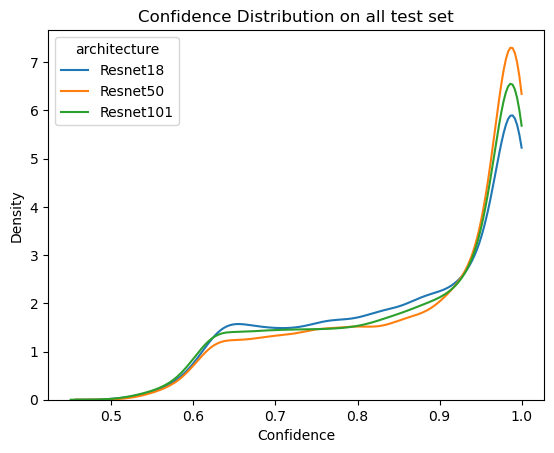

In [17]:
df18["confidence"]=df18.max(axis=1) # prediction confidence
df50["confidence"]=df50.max(axis=1)
df101["confidence"]=df101.max(axis=1)
oc_res18 = df18["confidence"].mean()
oc_res50 = df50["confidence"].mean()
oc_res101 = df101["confidence"].mean()
print(f"{oc_res18=} | {oc_res50=} | {oc_res101=}")
sns.kdeplot(df18['confidence'], clip=[0, 1], label='Resnet18')
sns.kdeplot(df50['confidence'], clip=[0, 1], label='Resnet50')
sns.kdeplot(df101['confidence'], clip=[0, 1], label='Resnet101')
plt.title('Confidence Distribution on all test set')
plt.legend(title='architecture')
plt.xlabel('Confidence')
plt.ylabel('Density')

In [18]:
df["acc18"] = np.where(df["pred18"]==df["target"],1,0)
df["acc50"] = np.where(df["pred50"]==df["target"],1,0)
df["acc101"] = np.where(df["pred101"]==df["target"],1,0)
oa_res18 = df["acc18"].mean()
oa_res50 = df["acc50"].mean()
oa_res101 = df["acc101"].mean()
print(f"{oa_res18=} | {oa_res50=} | {oa_res101=}")

oa_res18=0.4668 | oa_res50=0.5314 | oa_res101=0.5112


,pred18,pred50,pred101,target,acc18,acc50,acc101,kl_18_50,kl_18_101,kl_50_18,kl_50_101,kl_101_18,kl_101_50,bin_kl
0,68,49,68,49,0,1,0,1.477612,-0.042931,2.256113,0.867416,1.115587,1.111376,"(0.665, 2.484]"
1,9,38,88,33,0,0,0,1.219887,0.061681,1.195148,1.263394,0.471680,1.038579,"(0.665, 2.484]"


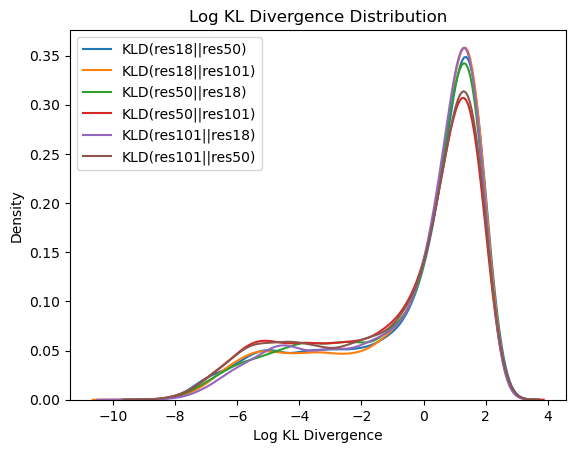

In [21]:
def calc_kl(Q,P,numclass):
    return np.log(rel_entr(Q.iloc[:,0:numclass],P.iloc[:,0:numclass]).sum(1))
df["kl_18_50"] = calc_kl(df18,df50,100)
df["kl_18_101"] = calc_kl(df18,df101,100)
df["kl_50_18"] = calc_kl(df50,df18,100)
df["kl_50_101"] = calc_kl(df50,df101,100)
df["kl_101_18"] = calc_kl(df101,df18,100)
df["kl_101_50"] = calc_kl(df101,df50,100)
display(df.head(2))
sns.kdeplot(df["kl_18_50"], label='KLD(res18||res50)')
sns.kdeplot(df["kl_18_101"], label='KLD(res18||res101)')
sns.kdeplot(df["kl_50_18"], label='KLD(res50||res18)')
sns.kdeplot(df["kl_50_101"], label='KLD(res50||res101)')
sns.kdeplot(df["kl_101_18"], label='KLD(res101||res18)')
sns.kdeplot(df["kl_101_50"], label='KLD(res101||res50)')
plt.title('Log KL Divergence Distribution')
plt.xlabel('Log KL Divergence')
plt.ylabel('Density')
plt.legend()

bin_kl
(-8.344, -6.526]     244
(-6.526, -4.719]     792
(-4.719, -2.912]     885
(-2.912, -1.105]     973
(-1.105, 0.702]     2189
(0.702, 2.509]      4917
Name: count, dtype: int64


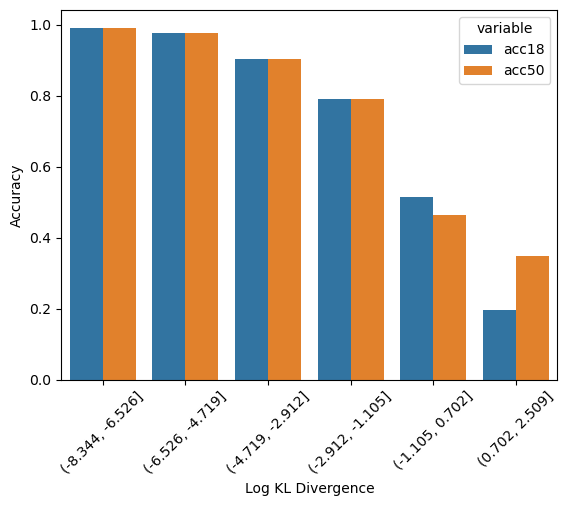

bin_kl
(-9.498, -7.49]       26
(-7.49, -5.494]      566
(-5.494, -3.498]     975
(-3.498, -1.502]     961
(-1.502, 0.494]     2025
(0.494, 2.49]       5447
Name: count, dtype: int64


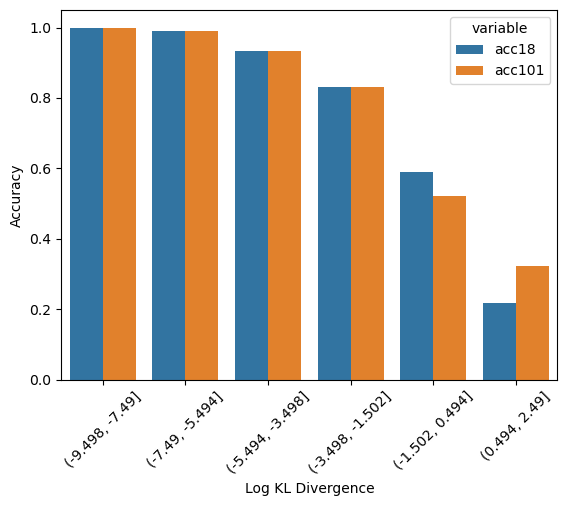

bin_kl
(-8.58, -6.712]      148
(-6.712, -4.856]     697
(-4.856, -3.001]    1026
(-3.001, -1.145]    1100
(-1.145, 0.711]     2332
(0.711, 2.567]      4697
Name: count, dtype: int64


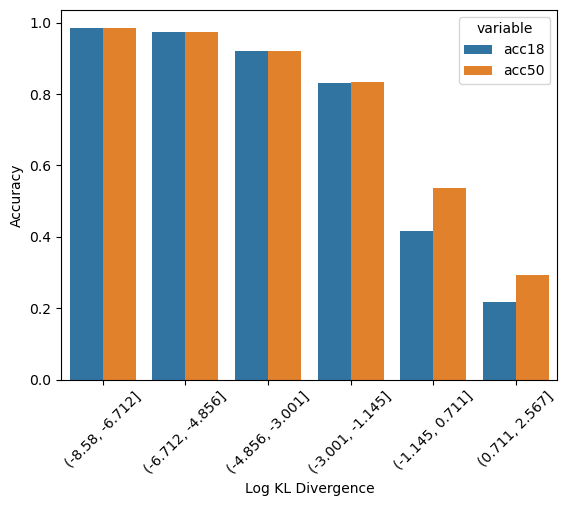

bin_kl
(-8.404, -6.553]     238
(-6.553, -4.713]     974
(-4.713, -2.873]    1047
(-2.873, -1.033]    1168
(-1.033, 0.806]     2540
(0.806, 2.646]      4033
Name: count, dtype: int64


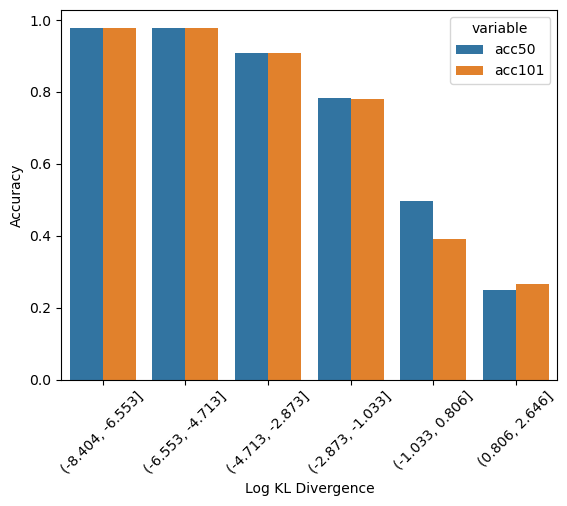

bin_kl
(-9.385, -7.383]      24
(-7.383, -5.393]     501
(-5.393, -3.403]    1023
(-3.403, -1.413]    1085
(-1.413, 0.577]     2206
(0.577, 2.567]      5161
Name: count, dtype: int64


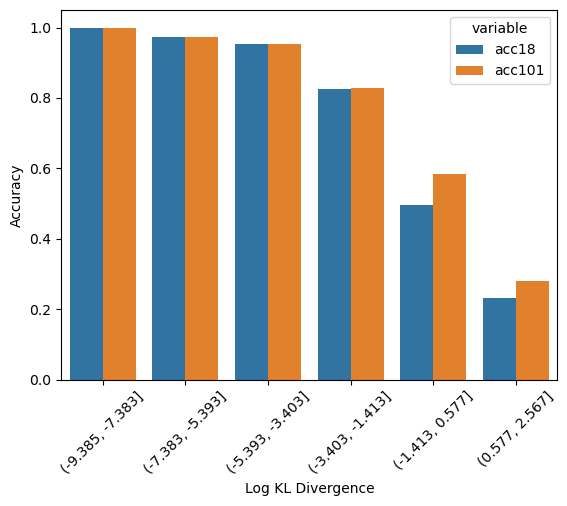

bin_kl
(-8.446, -6.615]     213
(-6.615, -4.795]     919
(-4.795, -2.975]    1033
(-2.975, -1.155]    1084
(-1.155, 0.665]     2238
(0.665, 2.484]      4513
Name: count, dtype: int64


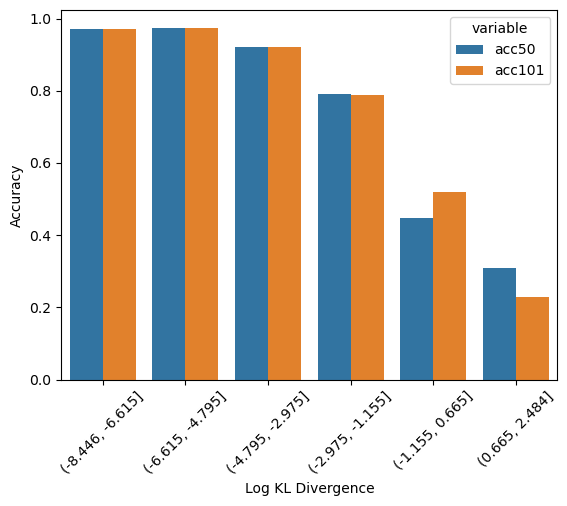

In [20]:
def bin_kl_vis(df_in, binnum,kl_name,acc_col1,acc_col2):
    df=df_in
    tempcol = "bin_kl"
    df[tempcol] = pd.cut(df[kl_name].clip(-20,10), bins=binnum)
    print(df[tempcol].value_counts().sort_index())
    grouped = df.groupby(tempcol)[[acc_col1,acc_col2]].mean().reset_index()
    melted_grouped = grouped.melt(id_vars=tempcol, var_name='variable', value_name='value')
    sns.barplot(x=tempcol, y='value', hue='variable', data=melted_grouped)
    plt.xticks(rotation=45)
    plt.xlabel("Log KL Divergence")
    plt.ylabel("Accuracy")
    plt.show()
bin_kl_vis(df, binnum, "kl_18_50", "acc18", "acc50")
bin_kl_vis(df, binnum, "kl_18_101", "acc18", "acc101")
bin_kl_vis(df, binnum, "kl_50_18", "acc18", "acc50")
bin_kl_vis(df, binnum, "kl_50_101", "acc50", "acc101")
bin_kl_vis(df, binnum, "kl_101_18", "acc18", "acc101")
bin_kl_vis(df, binnum, "kl_101_50", "acc50", "acc101")